# Explore-Then-Commit Algorithm (ETC)

-------

#### まずはETCのアルゴリズムを書き, それを説明していきたいと思います．

今回はk個のアームがあると想定し, 各アームをm回ずつ選ぶとします，
$\hat{u}_{i}$はt回目までのアームiの平均報酬を表すとします．

1. mを入力

2. t回目のアクションの選び方は 

$$A_t = \left\{
    \begin{array}{ll}
    (t \bmod k + 1) & (mk \geq t) \\
    \arg\max_{i}\hat{u}_{i}(mk) & (mk \lt t)
    \end{array}
\right.
$$

##### バンディットにおけるリグレットとは最適なアームの報酬と実際に選んだアームの報酬の差になります．
$$
Regret = u_{*} - u_{i}
$$

----

##### まずリグレットの定義は

\begin{equation}
Regret(T) = \sum_{t=1}^{T} (\mu_{*} - \mu_{a_{t}})
\end{equation}

##### i番目のアームを引いたときのRegretを$\Delta_{i}$で現していきます

##### そのように定義すると総回数n回したときのリグレットは下の定数で抑えられます

\begin{equation}
Regretbound \le m \sum_{i=i}^{k} \Delta_{i}  + (n - mk) \sum_{i=i}^{k} \Delta_{i} exp(\frac{- m\Delta_{i}^{2}}{4})
\end{equation}

---

##### まずETCのアルゴリズムを書いていきます．

In [9]:
import numpy as np
class ETC:
    def __init__(self,n: int, k: int, m: int):
        '''
        self.cul_reward -> 各アームの累積報酬
        self.cul_index -> 各アームの選ばれた数
        self.k -> アームの数
        self.reward -> 各アームの報酬 
        self.regret -> リグレットの大きさ
        '''
        self.cul_reward = np.zeros(k)
        self.cul_index = np.zeros(k)
        self.n = n
        self.k = k
        self.m = m
        self.reward = np.random.rand(k)
        self.regret = np.zeros(n)
    def choose_arm(self,t):
        #上で説明した条件式
        if t > self.m * self.k:
            return np.argmax(self.cul_reward), self.reward[np.argmax(self.cul_reward)]
        else:
            return t % self.k, self.reward[t % self.k]

    def update(self,index,reward,t):
        self.cul_index[index] += 1
        self.cul_reward[index] += reward
        if t == 0:
            self.regret[t] = (self.reward[self.opt_arm_reward()] - self.reward[index])
        else:
            self.regret[t] = (self.reward[self.opt_arm_reward()] - self.reward[index]) + self.regret[t-1]

    def opt_arm_reward(self):
        #最適のアームを返す
        return np.argmax(self.reward)



In [21]:
n = 50000
k = 5
m = 5000

In [22]:
etc = ETC(n = n,k = k,m=m)

In [28]:
from tqdm import tqdm
for i in tqdm(range(n)):
    
    arm,reward = etc.choose_arm(i)
    etc.update(arm,reward,i)

100%|██████████| 50000/50000 [00:00<00:00, 92993.86it/s] 


In [29]:
def regret_bound(regret):
    return m * regret + (n - m * k) * regret * np.exp(-m * regret / 4)

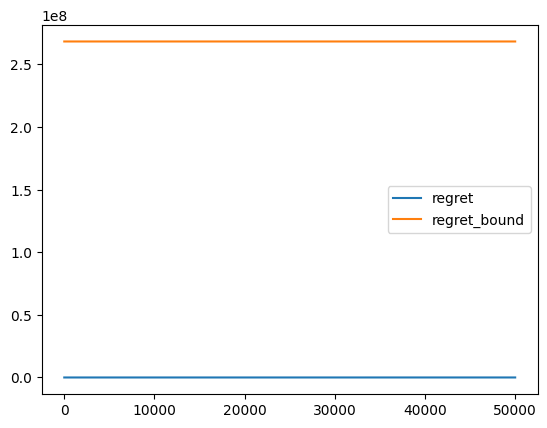

In [30]:
import matplotlib.pyplot as plt
x = np.arange(0,n)
plt.plot(x,etc.regret,label='regret')
plt.plot(x,[etc.regret.sum() for _ in range(n)],label='regret_bound')
plt.legend()